# Dropout and Batch Normalization

Reference: [Kaggle](https://www.kaggle.com/code/ryanholbrook/dropout-and-batch-normalization)

## Dropout

- can help correct overfitting
- to recognize spurius patterns that happens on overfitting models, a network will often rely on a very specific combinations of weights, a ***conspiracy*** of weights, remove one and the conspiracy talls apart
- this is the idea behind **dropout**, to breakup these conspiracies we randomly *drop out* some fraction of a layer's input units every step of training, making it much harder for the network to learn those spuriurs patterns in the traning data, searching for *general pattenrs*
    - You could also think about dropout as creating a kind of ensemble of networks
    
    
    
```
keras.Sequential([
    # ...
    layers.Dropout(rate=0.3), # apply 30% dropout to the next layer
    layers.Dense(16),
    # ...
])

```

## Batch Normalization

- can help correct training that is slow or unstable
- With neural networks, it's generally a good idea to put all of your data on a common scale, perhaps with something like scikit-learn's StandardScaler or MinMaxScaler.
- Now, if it's good to normalize the data before it goes into the network, maybe also normalizing inside the network would be better! In fact, we have a special kind of layer that can do this, the batch normalization layer.

```
layers.Dense(16, activation='relu'),
layers.BatchNormalization(),
```

or

```
layers.Dense(16),
layers.BatchNormalization(),
layers.Activation('relu'),
```

## Example

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn

import tensorflow as tf

In [3]:
red_wine = pd.read_csv('red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

print(red_wine.shape)
red_wine.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

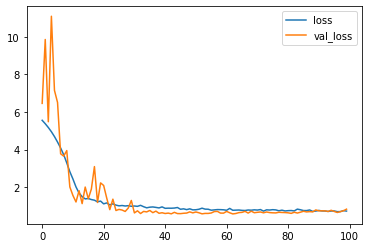

In [5]:
model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
    verbose=0,
)


# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();